In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
# Each row in numpy array has 64 entries
digits.data[0:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
print(digits.DESCR)


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

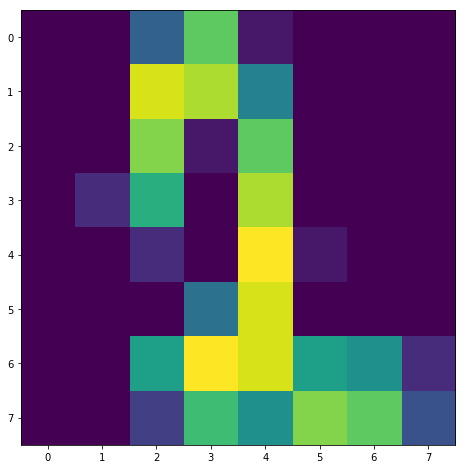

Actual digit is:  2


In [6]:
plt.figure(figsize=(10,8))
i = 12
matrix = np.reshape(digits.data[i:i+1], (8,8))
plt.imshow(matrix)
plt.show()

print('Actual digit is: ',digits.target[i])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.3,random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
score = classifier.score(X_test, y_test)
print(score)

0.9537037037037037


In [11]:
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)

In [12]:
confusion_matrix

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  2,  0,  3,  0],
       [ 0,  0, 51,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 52,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 50,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 55,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 53]], dtype=int64)

In [13]:
class_report=metrics.classification_report(y_test, y_pred)

In [14]:
print(class_report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.89      0.90      0.90        52
          2       0.96      0.96      0.96        53
          3       0.93      0.96      0.95        54
          4       0.98      1.00      0.99        48
          5       0.98      0.96      0.97        57
          6       0.95      0.98      0.97        60
          7       1.00      0.94      0.97        53
          8       0.92      0.90      0.91        61
          9       0.95      0.93      0.94        57

avg / total       0.95      0.95      0.95       540



In [15]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.1925925925925926
Mean Squared Error:  1.0703703703703704
Root Mean Squared Error:  1.0345870530653138
